In [18]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading data set
df=pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
#To check shape of data
df.shape

(9994, 13)

In [38]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df=df.drop('Postal Code',axis=1)
df=df.drop('Country',axis=1)

In [7]:
print(df.shape)
df['City'].value_counts()

(9994, 11)


New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Redwood City       1
Davis              1
Billings           1
Lindenhurst        1
Murrieta           1
Name: City, Length: 531, dtype: int64

In [41]:
#To check null values
df.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
print(df['Category'].unique())
print(df['Sub-Category'].unique())

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [9]:
#To check Ship mode types
df['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [30]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


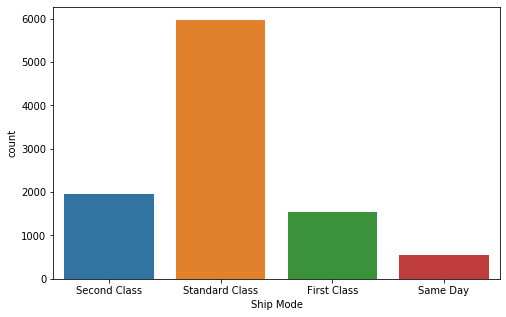

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x=df['Ship Mode'])

In [11]:
#To see sub-category wise distribution
df['Sub-Category'].value_counts(sort=False)

Appliances      466
Phones          889
Chairs          617
Storage         846
Paper          1370
Labels          364
Bookcases       228
Supplies        190
Tables          319
Fasteners       217
Furnishings     957
Machines        115
Accessories     775
Art             796
Binders        1523
Copiers          68
Envelopes       254
Name: Sub-Category, dtype: int64

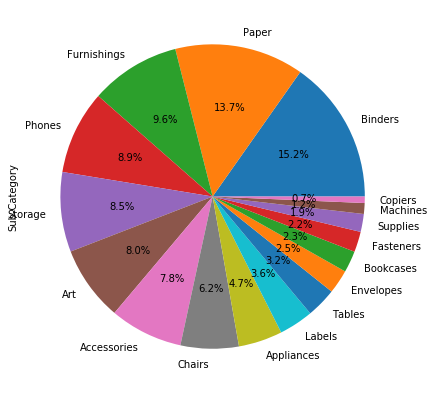

In [46]:
plt.figure(figsize=(12,7))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

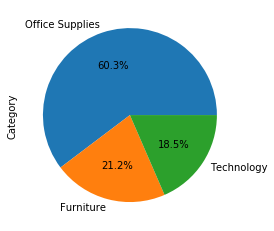

In [12]:
df['Category'].value_counts().plot.pie(autopct="%1.1f%%")

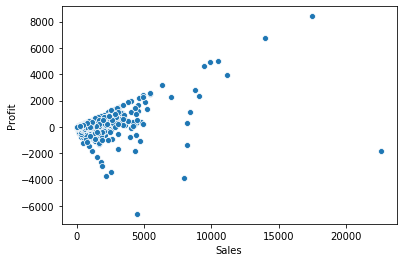

In [13]:
#scatterplot of sales and profit
sns.scatterplot("Sales","Profit",data=df)

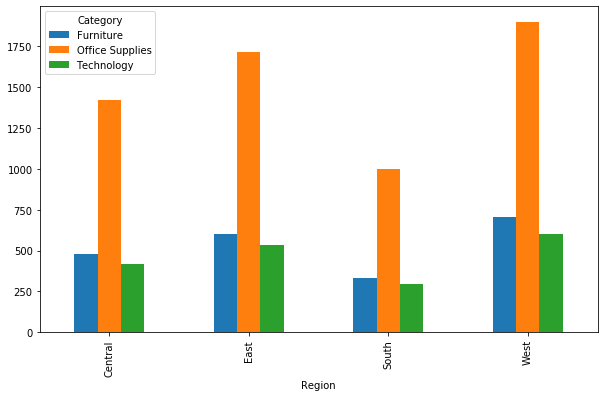

In [14]:
#To see Category-wise distribution of various regions
pd.crosstab(df['Region'],df['Category']).plot(kind='bar',figsize=(10,6))

In [15]:
#Top profitable cities
df1=df.groupby('City')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df1

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
...,...,...
80,Chicago,-6654.5688
241,Lancaster,-7239.0684
434,San Antonio,-7299.0502
207,Houston,-10153.5485


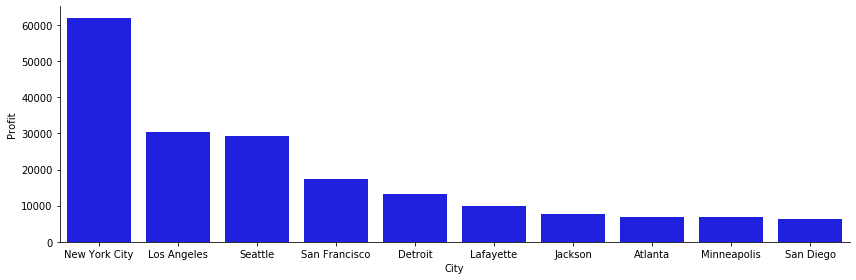

In [16]:
sns.catplot('City','Profit',data=df1.head(10),kind='bar',height=4,aspect=3,color='blue')
plt.show()


In [28]:
#Top Profitable Sub-Category
df2 = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by='Profit',ascending=False)
df2

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


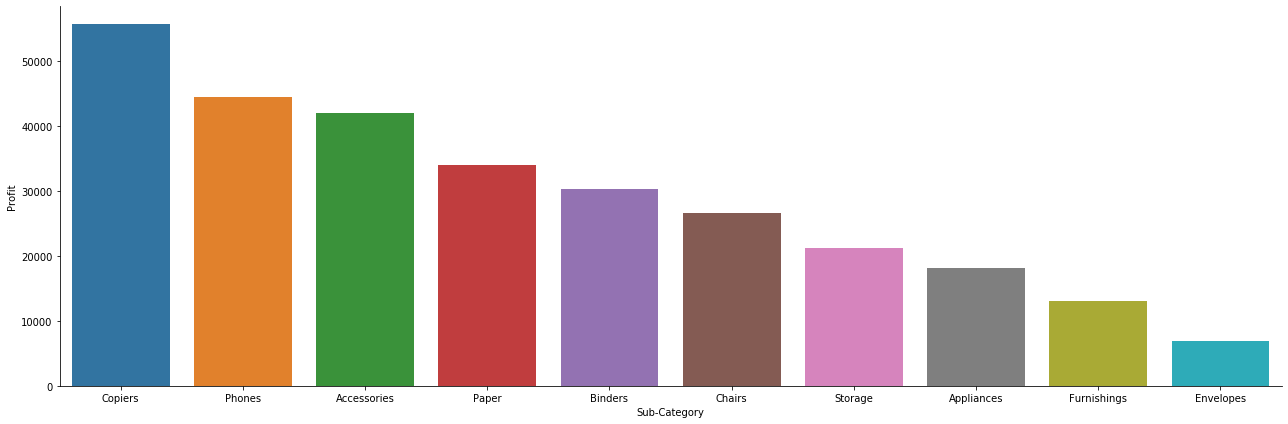

In [29]:
sns.catplot(x='Sub-Category',y='Profit',data=df2.head(10),kind='bar',height=6,aspect=3)
plt.show()